In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.ensemble as en

import pickle

%matplotlib inline

# Generate mock data

We start with some mock data in 2D, consisted of two populations drawn from two different 2D Gaussian distributions. The two populations are intentionally constructed with a clear separation such that sharp transitions in a random forest classifier will be clearly visible.

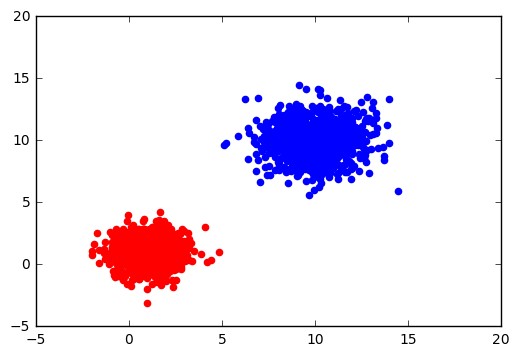

In [2]:
mean_1 = np.array([1.,1.])
cov_1 = np.array([[1,0],[0,1]])

mean_2 = np.array([10.,10.])
cov_2 = np.array([[2.,0],[0,2.]])

pop_1 = np.random.multivariate_normal(mean_1,cov_1,1000)
pop_2 = np.random.multivariate_normal(mean_2,cov_2,1000)

plt.scatter(pop_1[:,0],pop_1[:,1],color='red')
plt.scatter(pop_2[:,0],pop_2[:,1],color='blue')

In [3]:
y = np.hstack((np.zeros(1000),np.ones(1000)))
X = np.vstack((pop_1,pop_2))
print X
print y

[[  1.17090555   2.05071106]
 [  1.17299234   0.87966516]
 [  2.32646441   1.38762475]
 ..., 
 [ 11.67921857   8.50210461]
 [  9.656403     9.88830173]
 [  9.28258907   8.05146939]]
[ 0.  0.  0. ...,  1.  1.  1.]


# Train the RF Classifier

We then train a sklearn RandomForestClassifier using the mock data. The trained classifier model object is then saved.

In [4]:
rf = en.RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

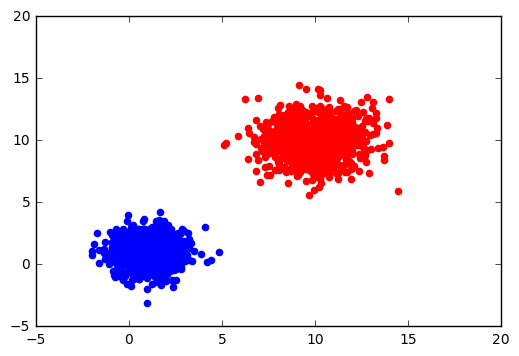

In [5]:
y2 = rf.predict_proba(X)[:,1]
sel = y2==1

plt.scatter(X[sel,0],X[sel,1],color='red')
plt.scatter(X[~sel,0],X[~sel,1],color='blue')

In [6]:
pickle.dump(rf,open('model.pkl','wb'))

# Applying the Monte Carlo method

We then load the trained model object and apply the Monte Carlo method to it. The goal here is to recover the P(y=1|x) curves and see if we can observe and detect the expected sharp transitions.

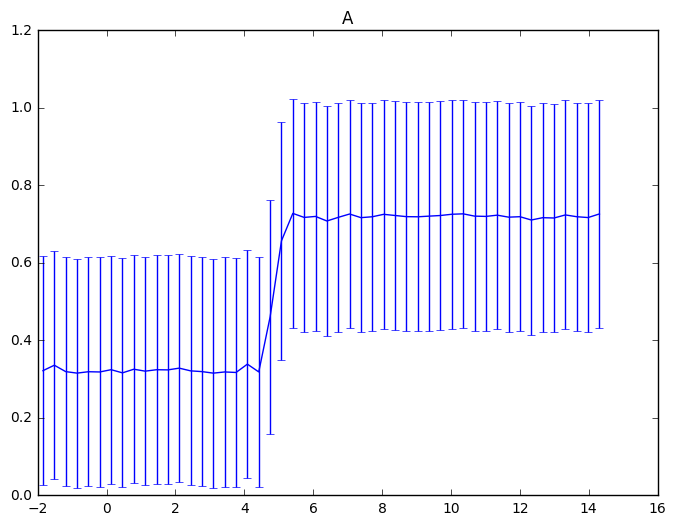

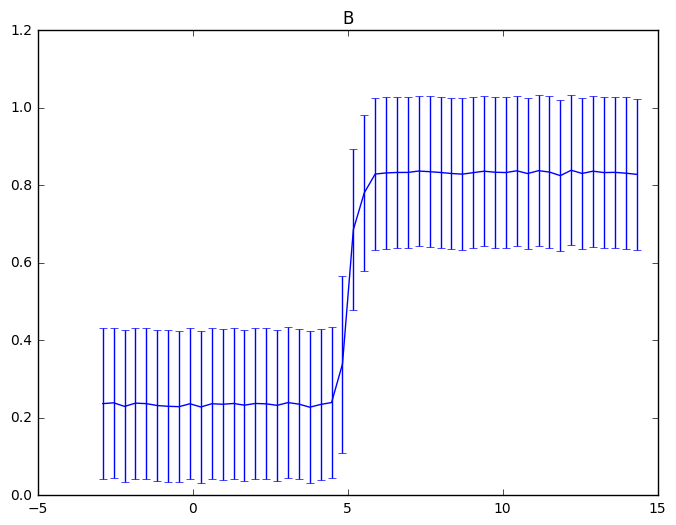

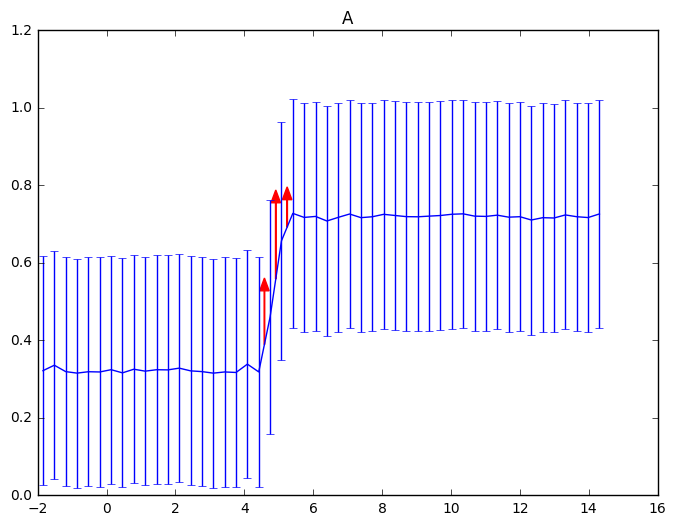

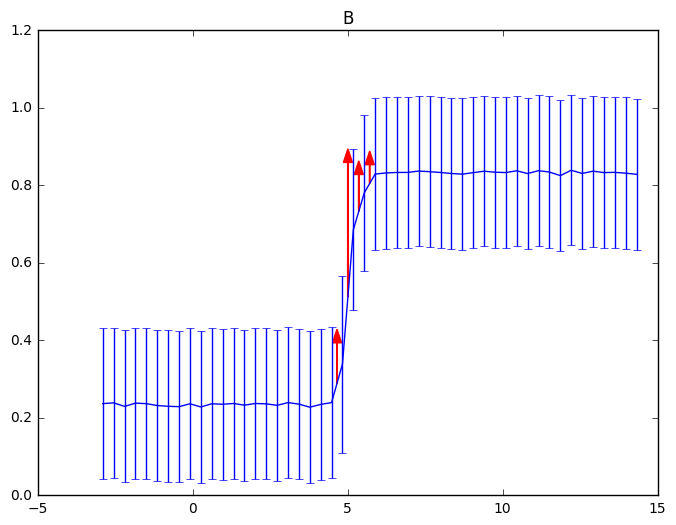

In [7]:
import montecarlo as mc
reload(mc)

model = pickle.load(open('model.pkl','rb'))
tester = mc.MonteCarlo(model=model, X_in=X, X_names=['A','B'])
tester.generate(n_sample=100000, n_bins=50)
tester.plot_curves()
tester.edge_detect()
